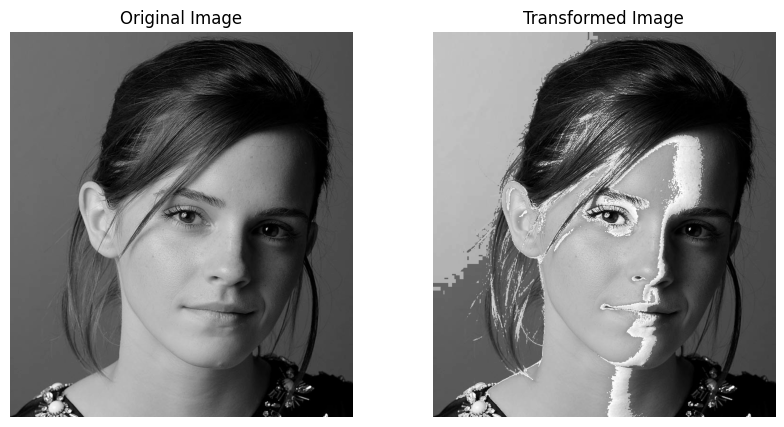

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image (Fig. 1b)
img = cv2.imread('a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

# Define the intensity transformation function
def intensity_transformation(input_intensity):
    if input_intensity < 100:
        return input_intensity  # Linear with slope 1
    # 2.5 * input_intensity  # Linear with slope 2.5
    elif input_intensity <= 150:
        return input_intensity*1.55 + 22.5
    else:
        return input_intensity  # Linear with slope 1

# Apply the intensity transformation to the image
transformed_img = np.zeros_like(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        transformed_img[i, j] = intensity_transformation(img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_img, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


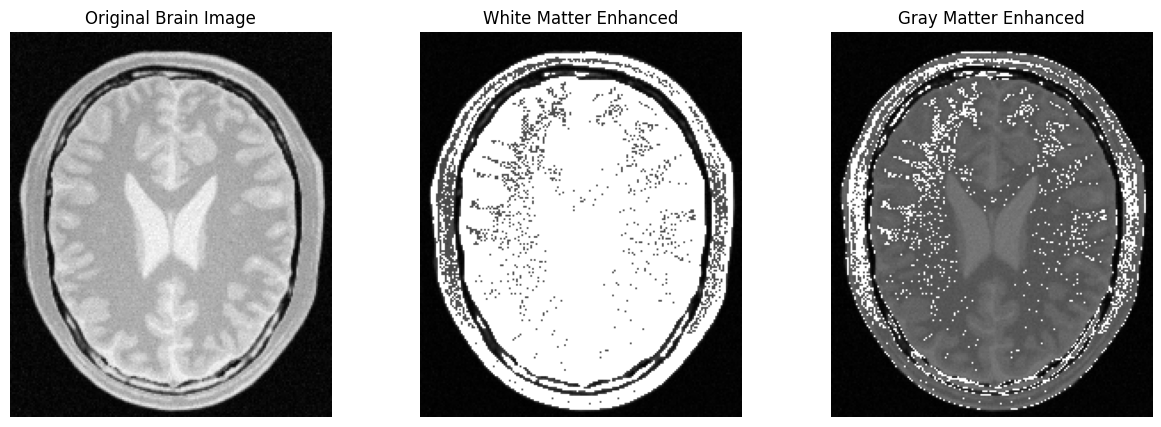

In [59]:
# Load the brain proton density image (Fig. 2)
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)

# Define intensity transformation for white and gray matter
# You may need to tune the values for white and gray matter intensity ranges based on the image

def transform_for_white_matter(input_intensity):
    if input_intensity >= 160:  # White matter is typically in higher intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

def transform_for_gray_matter(input_intensity):
    if 100 <= input_intensity < 160:  # Gray matter intensity range
        return 255  # Enhance
    else:
        return input_intensity * 0.5  # Suppress

# Apply transformations for both white and gray matter
white_matter_img = np.zeros_like(brain_img)
gray_matter_img = np.zeros_like(brain_img)

for i in range(brain_img.shape[0]):
    for j in range(brain_img.shape[1]):
        white_matter_img[i, j] = transform_for_white_matter(brain_img[i, j])
        gray_matter_img[i, j] = transform_for_gray_matter(brain_img[i, j])

# Plot the original and transformed images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(brain_img, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(white_matter_img, cmap='gray')
plt.title('White Matter Enhanced')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_matter_img, cmap='gray')
plt.title('Gray Matter Enhanced')
plt.axis('off')

plt.show()


#### 3.1

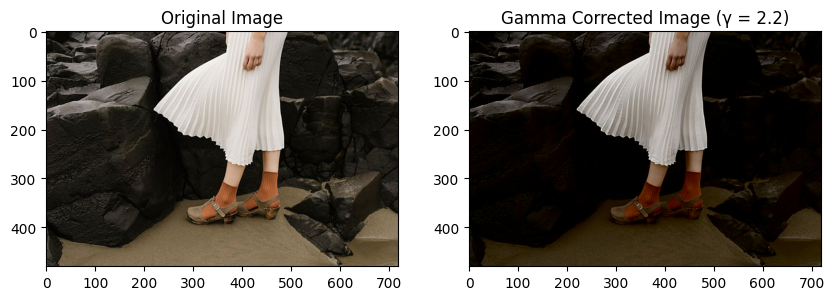

In [60]:
# Load the image for gamma correction (Figure 3)
img = cv2.imread('a1images/highlights_and_shadows.jpg')

# Convert the image to L*a*b* color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split L*, a*, and b* channels
L, a, b = cv2.split(lab_img)

# Apply gamma correction to the L channel (assume γ=2.2 for this example)
gamma = 2.2
L_normalized = L / 255.0
L_gamma_corrected = np.power(L_normalized, gamma)
L_gamma_corrected = (L_gamma_corrected * 255).astype(np.uint8)

# Merge back the channels and convert to BGR
lab_img_corrected = cv2.merge([L_gamma_corrected, a, b])
gamma_corrected_img = cv2.cvtColor(lab_img_corrected, cv2.COLOR_LAB2BGR)

# Display original and gamma-corrected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_corrected_img, cv2.COLOR_BGR2RGB))
plt.title(f'Gamma Corrected Image (γ = {gamma})')

plt.show()


#### 3.2

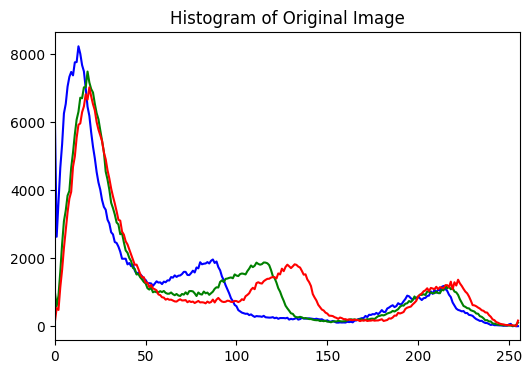

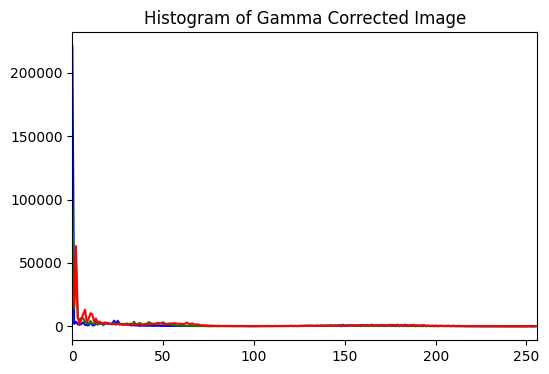

In [61]:
# Function to plot histograms
def plot_histograms(image, title):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(6, 4))
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
    plt.title(title)
    plt.xlim([0, 256])

# Plot histograms of the original and gamma corrected images
plot_histograms(img, "Histogram of Original Image")
plot_histograms(gamma_corrected_img, "Histogram of Gamma Corrected Image")
plt.show()


#### 4.1

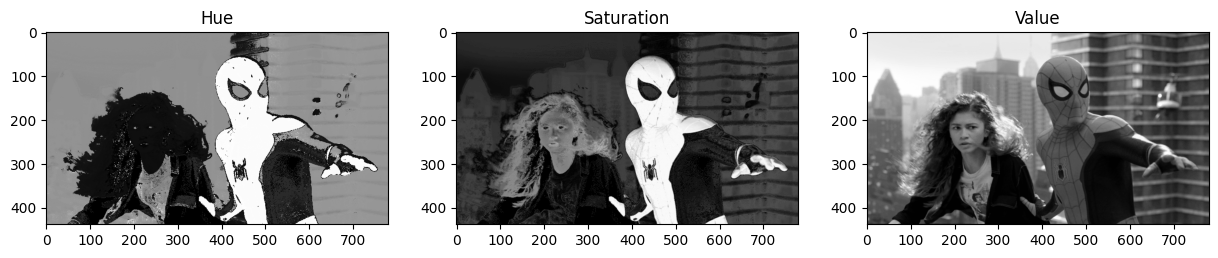

In [62]:
# Load the image (Figure 4)
img_vibrance = cv2.imread('a1images/spider.png')

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(hsv_img)

# Display each channel (Hue, Saturation, Value)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(h, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='gray')
plt.title('Value')

plt.show()

In [63]:
def vibrance_intensity_transformation(x, a, sigma=70):
    return np.minimum(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255)

# Set a value for a
a = 0.5

# Apply the intensity transformation to the saturation channel
s_transformed = vibrance_intensity_transformation(s.astype(np.float64), a)



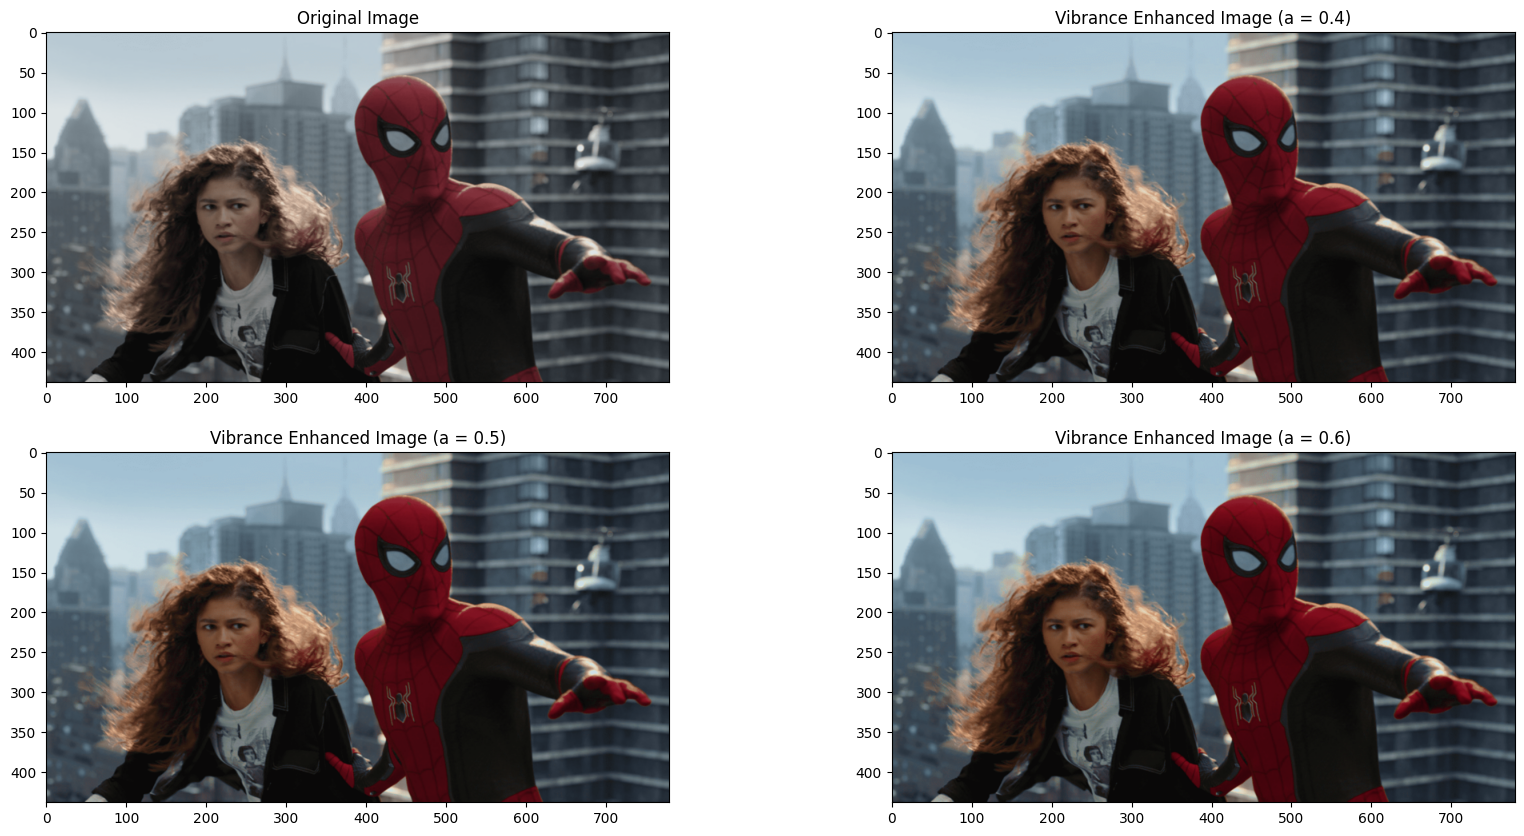

In [64]:
# Set a value for a
a = 0.4

# Apply the intensity transformation to the saturation channel
s_transformed1 = vibrance_intensity_transformation(s.astype(np.float64), a)

# Set a value for a
a = 0.5

# Apply the intensity transformation to the saturation channel
s_transformed2 = vibrance_intensity_transformation(s.astype(np.float64), a)

# Set a value for a
a = 0.6

# Apply the intensity transformation to the saturation channel
s_transformed3 = vibrance_intensity_transformation(s.astype(np.float64), a)

# Convert back to uint8
s_transformed1 = np.clip(s_transformed1, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed1 = cv2.merge([h, s_transformed1, v])
# Convert back to BGR color space
vibrance_enhanced_img1 = cv2.cvtColor(hsv_img_transformed1, cv2.COLOR_HSV2BGR)

# Convert back to uint8
s_transformed2 = np.clip(s_transformed2, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed2 = cv2.merge([h, s_transformed2, v])
# Convert back to BGR color space
vibrance_enhanced_img2 = cv2.cvtColor(hsv_img_transformed2, cv2.COLOR_HSV2BGR)

# Convert back to uint8
s_transformed3 = np.clip(s_transformed3, 0, 255).astype(np.uint8)
# Recombine the HSV channels
hsv_img_transformed3 = cv2.merge([h, s_transformed3, v])
# Convert back to BGR color space
vibrance_enhanced_img3 = cv2.cvtColor(hsv_img_transformed3, cv2.COLOR_HSV2BGR)

# Display original and vibrance-enhanced images
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img1, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.4)')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img2, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.5)')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img3, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = 0.6)')

plt.show()

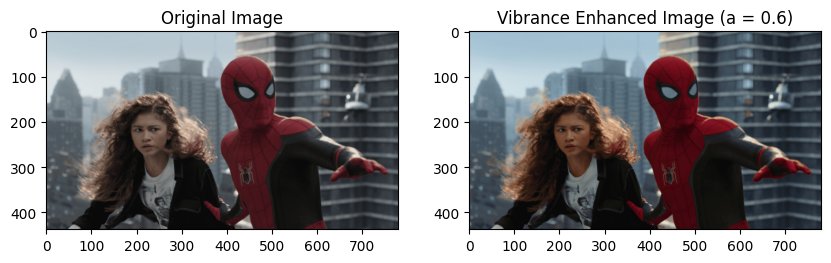

In [65]:

# Convert back to uint8
s_transformed = np.clip(s_transformed, 0, 255).astype(np.uint8)

# Recombine the HSV channels
hsv_img_transformed = cv2.merge([h, s_transformed, v])

# Convert back to BGR color space
vibrance_enhanced_img = cv2.cvtColor(hsv_img_transformed, cv2.COLOR_HSV2BGR)

# Display original and vibrance-enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_vibrance, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(vibrance_enhanced_img, cv2.COLOR_BGR2RGB))
plt.title(f'Vibrance Enhanced Image (a = {a})')

plt.show()

#### 5

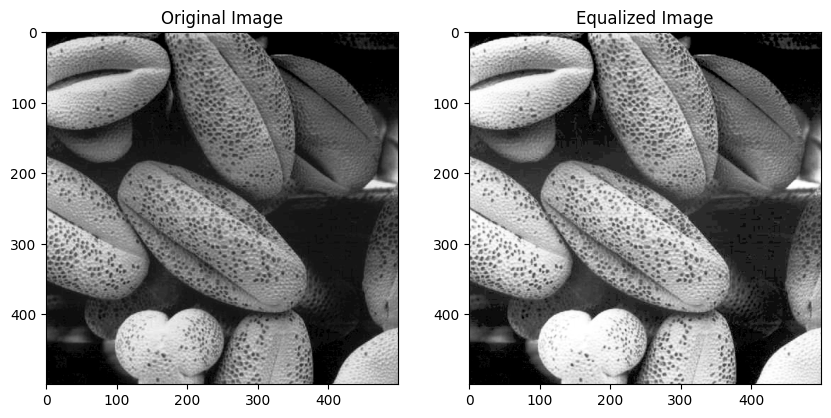

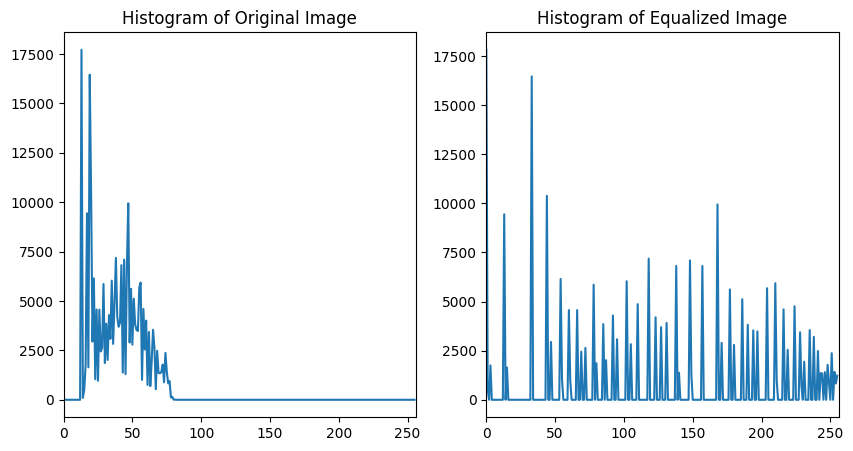

In [66]:
# Load the image (Figure 5)
img_hist_eq = cv2.imread('a1images/shells.tif', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img_hist_eq)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_hist_eq, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.show()

# Function to plot histograms
def plot_gray_histogram(image, title):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(title)
    plt.xlim([0, 256])

# Plot histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_gray_histogram(img_hist_eq, "Histogram of Original Image")

plt.subplot(1, 2, 2)
plot_gray_histogram(equalized_img, "Histogram of Equalized Image")

plt.show()


#### 6.1

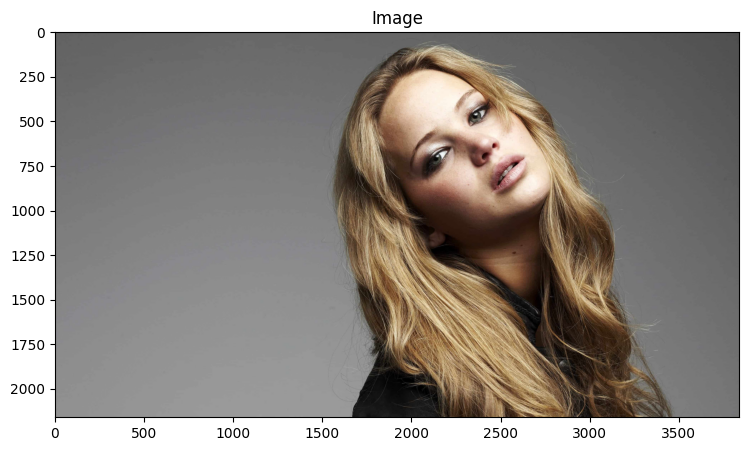

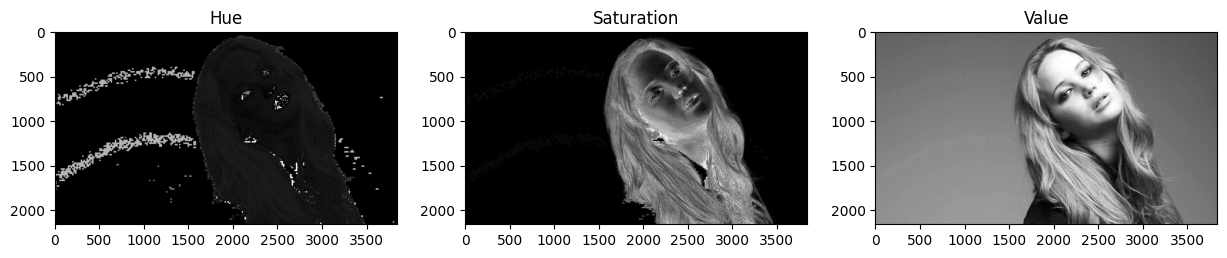

In [80]:
# Load the image
image = cv2.imread('a1images/jeniffer.jpg')  # Replace with actual image path

# Convert the image to HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split into hue, saturation, and value planes
h2, s2, v2 = cv2.split(image_rgb)


plt.figure(figsize=(15, 5))
plt.subplot(1, 1, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.show()

# Display each channel (Hue, Saturation, Value)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(h2, cmap='gray')
plt.title('Hue')

plt.subplot(1, 3, 2)
plt.imshow(s2, cmap='gray')
plt.title('Saturation')

plt.subplot(1, 3, 3)
plt.imshow(v2, cmap='gray')
plt.title('Value')

plt.show()

#### 6.2

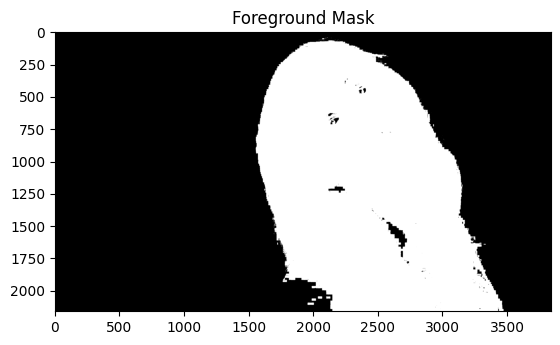

In [68]:
# Threshold the value plane to create a mask for the foreground
_, mask = cv2.threshold(s2, 13, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the binary mask using Matplotlib
plt.figure()
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()


#### 6.2 trash

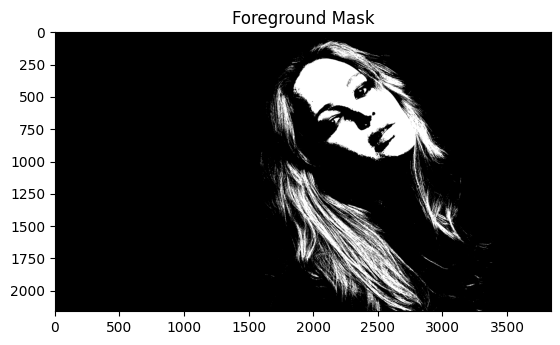

In [69]:
# Threshold the value plane to create a mask for the foreground
_, maskt = cv2.threshold(v2, 170, 255, cv2.THRESH_BINARY)  # Adjust the threshold value as needed

# Display the binary mask using Matplotlib
plt.figure()
plt.imshow(maskt, cmap='gray')
plt.title('Foreground Mask')
plt.show()

#### 6.3

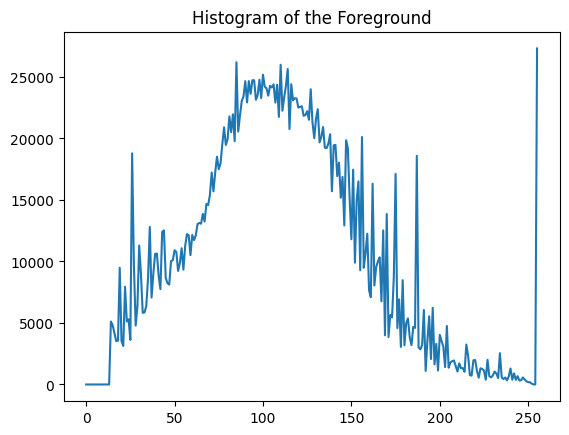

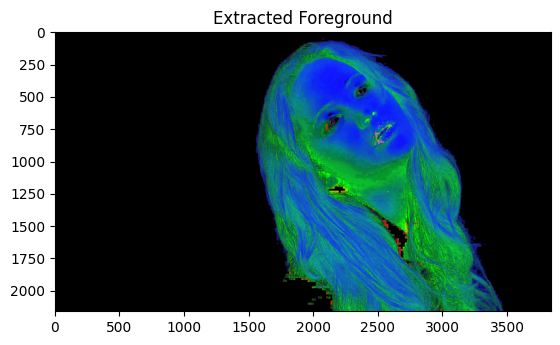

In [70]:
# Extract the foreground using the mask
foreground = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Compute histogram of the value plane of the foreground
hist = cv2.calcHist([s2], [0], mask, [256], [0, 256])

# Plot the histogram using Matplotlib
plt.figure()
plt.plot(hist)
plt.title('Histogram of the Foreground')
plt.show()

# Display the extracted foreground
plt.figure()
plt.imshow(foreground)
plt.title('Extracted Foreground')
plt.show()


#### 6.4

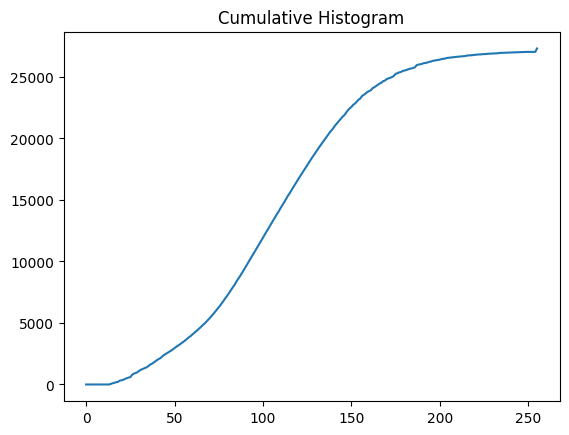

In [72]:
# Compute the cumulative sum of the histogram
cumsum_hist = np.cumsum(hist)

# Normalize the cumulative sum
cumsum_hist = cumsum_hist * hist.max() / cumsum_hist.max()

# Plot the cumulative histogram using Matplotlib
plt.figure()
plt.plot(cumsum_hist)
plt.title('Cumulative Histogram')
plt.show()


#### 6.5

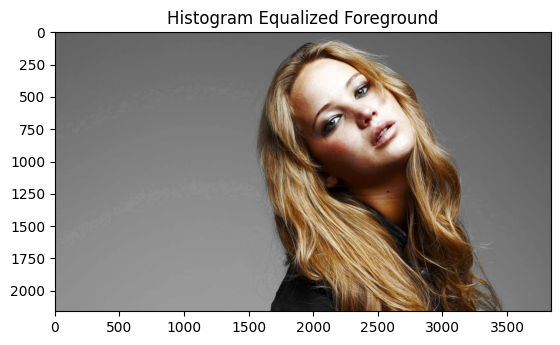

In [75]:
# Histogram equalization function
def histogram_equalization(s_plane, cumsum_hist):
    # Normalize the cumulative histogram
    cdf_min = cumsum_hist.min()
    cdf_normalized = ((cumsum_hist - cdf_min) * 255) / (cumsum_hist.max() - cdf_min)
    cdf_normalized = cdf_normalized.astype('uint8')
    
    # Apply the equalization
    equalized_s = cdf_normalized[s_plane]
    return equalized_s

# Apply histogram equalization to the value plane
equalized_s = histogram_equalization(s2, cumsum_hist)

# Merge the equalized V plane back with the H and S planes
equalized_hsv = cv2.merge([h2, equalized_s, v2])

# Convert back to RGB for display
equalized_image = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2RGB)

# Display the histogram-equalized foreground image using Matplotlib
plt.figure()
plt.imshow(equalized_image)
plt.title('Histogram Equalized Foreground')
plt.show()


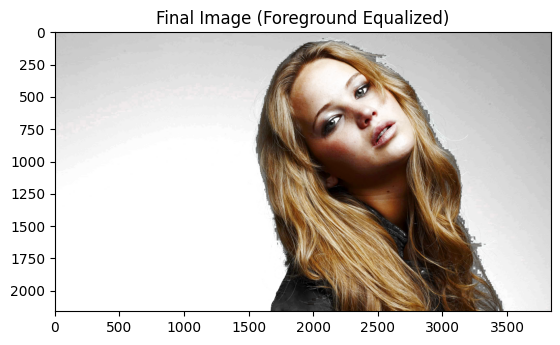

In [81]:
# Invert the mask to get the background
background_mask = cv2.bitwise_not(mask)

# Extract the background
background = cv2.bitwise_and(image, image, mask=background_mask)

# Combine the histogram-equalized foreground and background
combined_image = cv2.add(equalized_image, background)

# Display the final combined image using Matplotlib
plt.figure()
plt.imshow(combined_image)
plt.title('Final Image (Foreground Equalized)')
plt.show()
